# Andrei Zipis 29957115

## Research question/interests

Briefly describe your research question or interests here.

___

Can you accurately predict end of season standings from the first 20 games?  
Do 538's Game Quality scores accurately represent what humans perceive to be a quality game?  
Does a higher fan attendance result in a higher home advantage vs. lower?

___
## Milestone 2

Loading initial database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load initial data set
#df = pd.read_csv("../data/raw/nhl_elo_2022.csv")
#display(df)

In [3]:
#process attendance data, save to csv
#df1 = pd.read_excel("../data/raw/average_home_attendance_2021-22.xlsx", sheet_name="Data")
#df1 = df1.drop(columns="Unnamed: 0")
#df1 = df1.drop(df1.index[0:4])
#df1 = df1.reset_index()
#df1 = df1.drop(columns="index")
#df1 = df1.rename(columns={"Unnamed: 1": "home_team", "Unnamed: 2": "avg_attendance"})
#df1.to_csv("attendance_processed.csv", index=None)


In [4]:
#merge main data set with attendance
#attendance_df = pd.read_csv("../data/processed/attendance_processed.csv")
#df_combined = pd.merge(df, attendance_df, on="home_team")
#df_combined.to_csv("nhl_elo_processed.csv", index=None)

In [5]:
df = pd.read_csv("../data/processed/nhl_elo_processed.csv")
df.head(5)

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating,avg_attendance
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,1.311921,0.918273,2,6,1561.096238,1545.711971,95,35,65,19092
1,2022,2021-10-19,0,0,post,NaN,Tampa Bay Lightning,Florida Panthers,TBL,FLA,...,1.309136,0.921574,1,4,1559.747181,1544.088770,95,32,63,19092
2,2022,2021-10-23,0,0,post,SO,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,1.257830,0.976549,3,4,1556.869784,1556.798962,96,30,63,19092
3,2022,2021-10-28,0,0,post,NaN,Tampa Bay Lightning,Arizona Coyotes,TBL,ARI,...,1.463705,0.755541,5,1,1559.685020,1457.612573,50,18,34,19092
4,2022,2021-11-01,0,0,post,NaN,Tampa Bay Lightning,Washington Capitals,TBL,WSH,...,1.288894,0.943267,3,2,1561.564304,1538.993398,94,33,63,19092


---

## Milestone 3 Task 1

<AxesSubplot:>

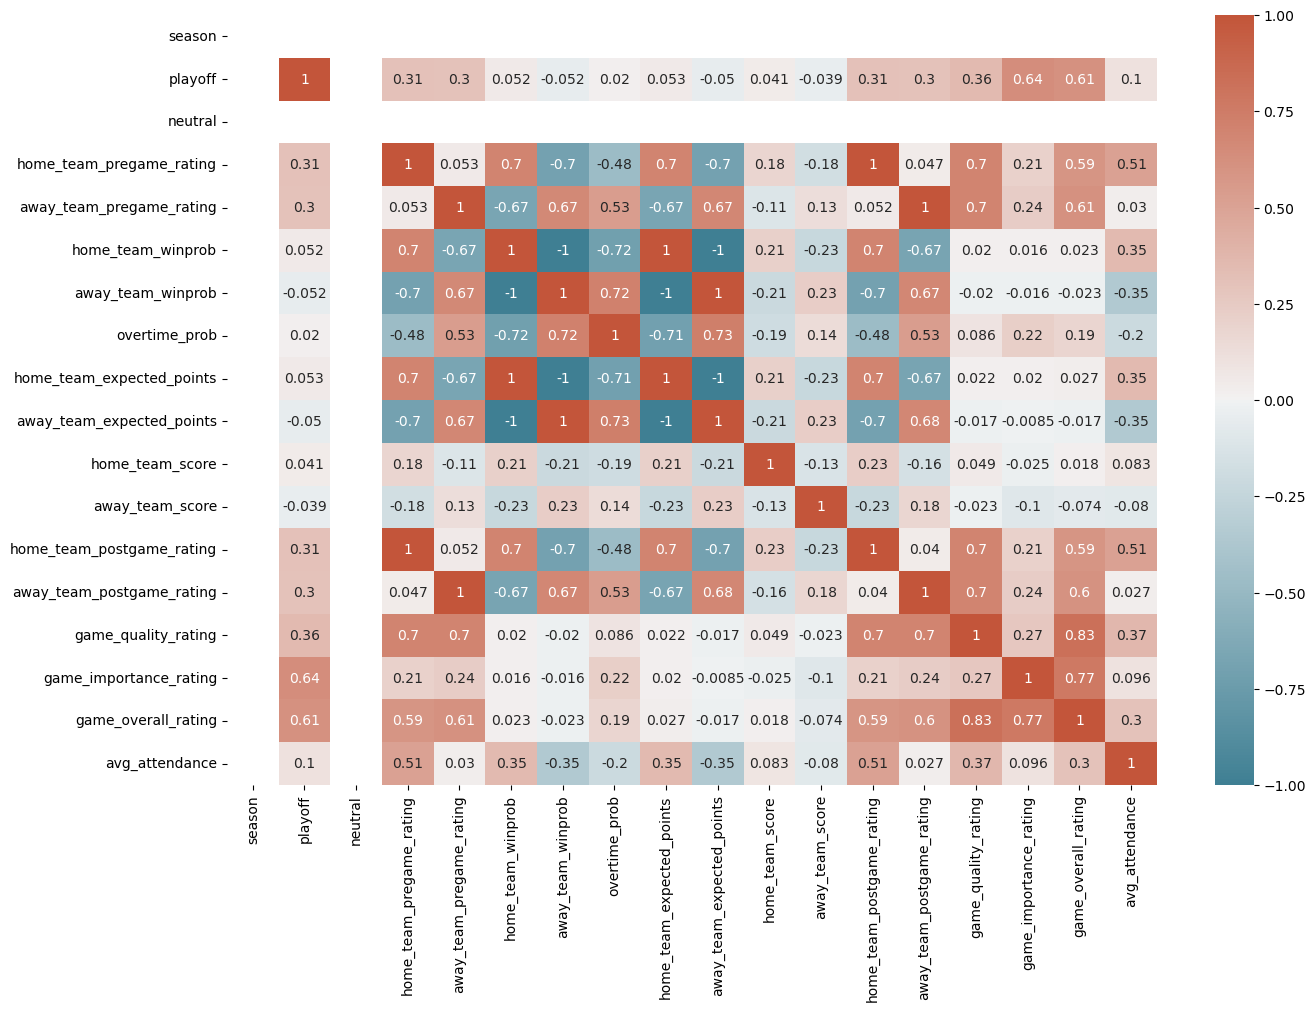

In [6]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## The above heatmap shows correlations between my columns.
In my opinion, there are no correlations that stand out that do not contribute to 538's formulas in creating those columns. If anything the heatmap strengthened the notion that the data needs to processed. For instance, Wins and Losses need to be added to the columns. Furthermore, standings are not tracked, and so it is hard to come away with any conclusions.

<AxesSubplot:xlabel='game_importance_rating', ylabel='home_team_pregame_rating'>

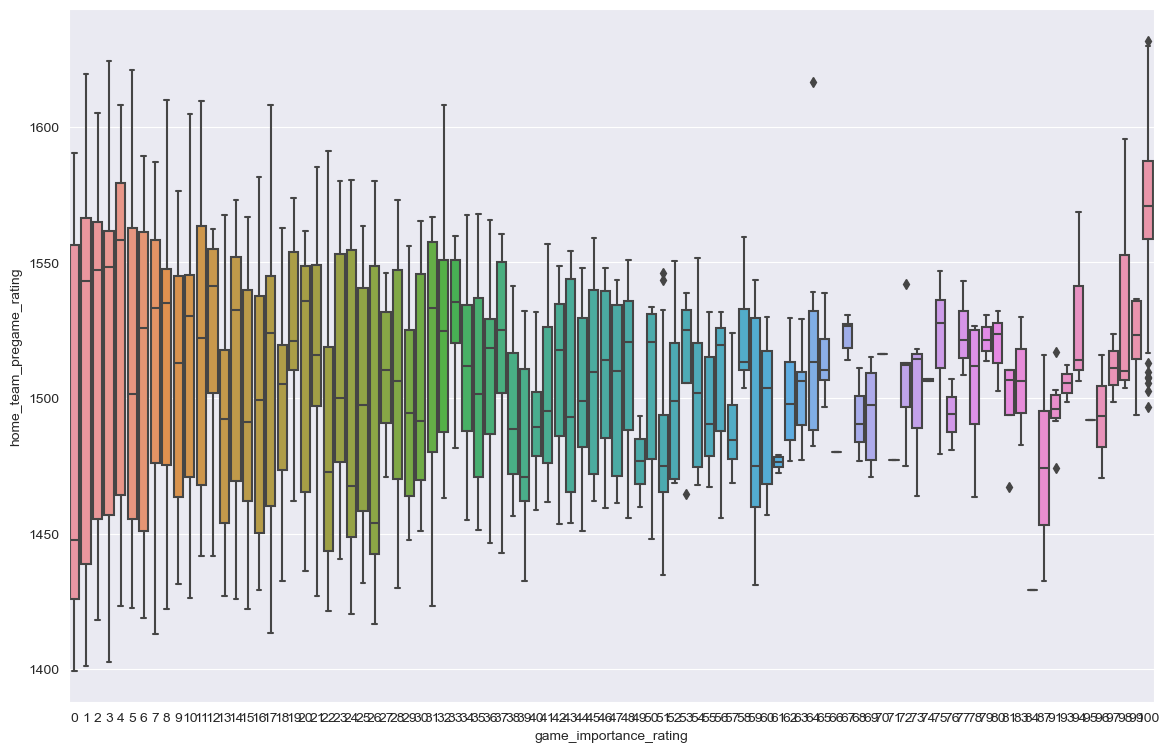

In [7]:
#pair plots
#hue='avg_attendance'
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.boxplot(x='game_importance_rating',y='home_team_pregame_rating',data=df, orient="v")

## The above boxplot shows correlation between the hometeam pregame rating and overall game importance.
From the eye test, it appears that home teams with a higher rating, are more likely to have important games. This would make sense as home teams should have a small advantage, thus making it that much more important to getting points for playoffs.

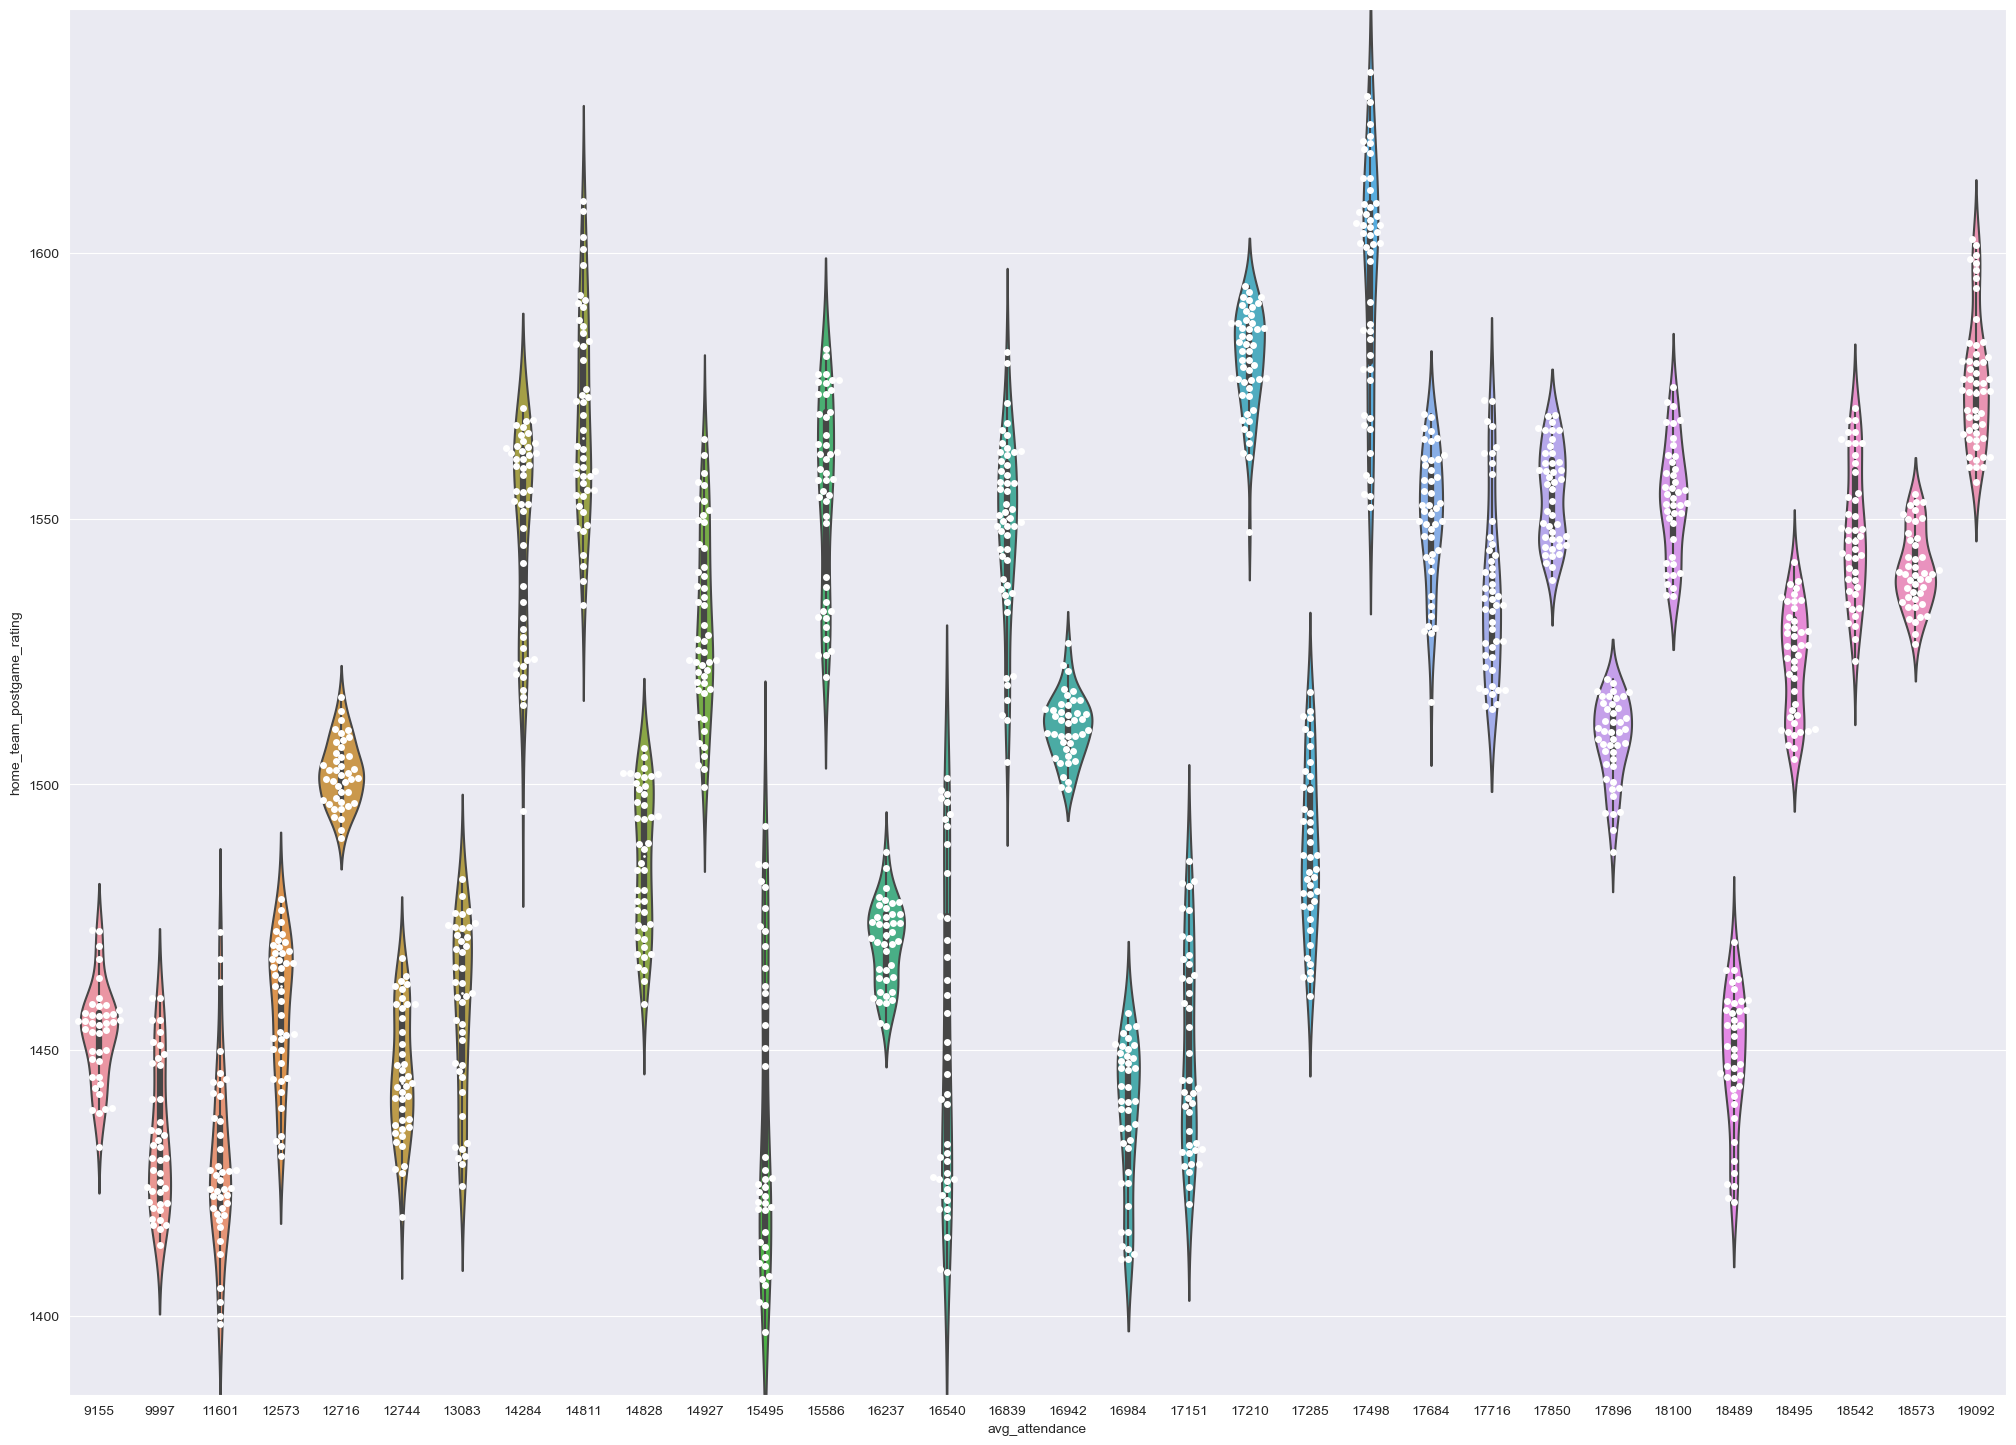

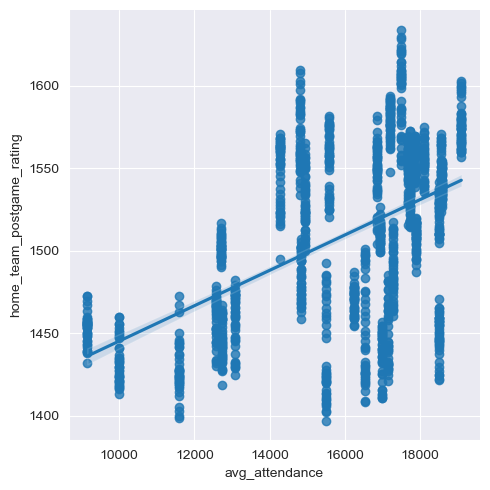

In [8]:
plt.figure(figsize=(25,18))
sns.set_style('darkgrid')
sns.violinplot(x='avg_attendance',y='home_team_postgame_rating',data=df)
sns.swarmplot(x='avg_attendance',y='home_team_postgame_rating',data=df, color='white')
sns.lmplot(x='avg_attendance',y='home_team_postgame_rating',data=df)


## The above plots show the postgame ratings of teams based on their home attendance.
As you would expect, better teams have a higher attendance. However, this is not enough to conclude that having a higher attendance leads to more wins.

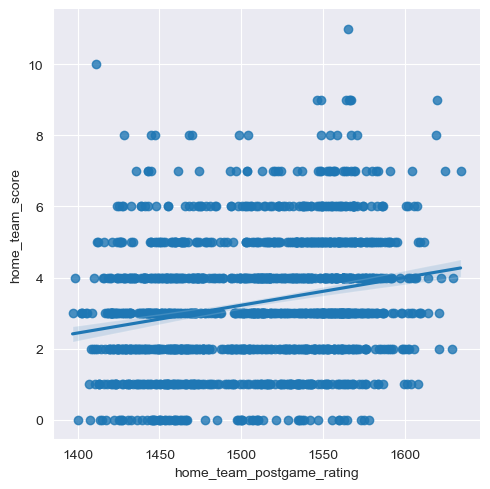

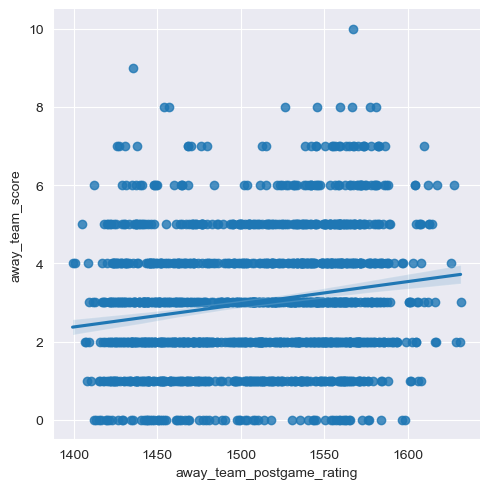

In [9]:
sns.lmplot(x='home_team_postgame_rating',y='home_team_score',data=df)
sns.lmplot(x='away_team_postgame_rating',y='away_team_score',data=df)

## The above plots show the amount of goals home and away teams score based on their postgame ratings.
As expected, better teams score more goals.

___

## Milestone 3 Task 2

Analysis pipeline

- Cleaning data
- Processing data
- Wrangling data

Below is the initial code written before method chaining and creating a function in a python file.

In [14]:
# Adding team, team abbreviation, wins, losses, overtime losses, game number, goals for, goals against, points

#df_winslosses = df.loc[df["date"].index.repeat(2),:].reset_index(drop=True)

#df_winslosses = (
#                df_winslosses.drop(columns=["season", "neutral", "status"])
#                .loc[df_winslosses["playoff"] == 0]
#                .reset_index(drop=True)
#)


#df_winslosses["team"] = np.where(df_winslosses.index % 2, df_winslosses["away_team"], df_winslosses["home_team"] )
#df_winslosses["abbr"] = np.where(df_winslosses.index % 2, df_winslosses["away_team_abbr"], df_winslosses["home_team_abbr"] )

#df_winslosses["wins"] = 0
#df_winslosses["wins"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]) & (df_winslosses["home_team_score"] > df_winslosses["away_team_score"]), df_winslosses["wins"]+1, df_winslosses["wins"])
#df_winslosses["wins"] = np.where((df_winslosses["team"] == df_winslosses["away_team"]) & (df_winslosses["away_team_score"] > df_winslosses["home_team_score"]), df_winslosses["wins"]+1, df_winslosses["wins"])

#df_winslosses["losses"] = 0
#df_winslosses["losses"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]) & (df_winslosses["home_team_score"] < df_winslosses["away_team_score"]) & df_winslosses["ot"].isnull() , df_winslosses["losses"]+1, df_winslosses["losses"])
#df_winslosses["losses"] = np.where((df_winslosses["team"] == df_winslosses["away_team"]) & (df_winslosses["away_team_score"] < df_winslosses["home_team_score"]) & df_winslosses["ot"].isnull(), df_winslosses["losses"]+1 , df_winslosses["losses"])

#df_winslosses["otl"] = 0
#df_winslosses["otl"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]) & (df_winslosses["home_team_score"] < df_winslosses["away_team_score"]) & df_winslosses["ot"].notnull() , df_winslosses["otl"]+1, df_winslosses["otl"])
#df_winslosses["otl"] = np.where((df_winslosses["team"] == df_winslosses["away_team"]) & (df_winslosses["away_team_score"] < df_winslosses["home_team_score"]) & df_winslosses["ot"].notnull() , df_winslosses["otl"]+1 , df_winslosses["otl"])


#df_winslosses = (
#                df_winslosses.drop(columns=["home_team_abbr", "away_team_abbr", "playoff", "ot", "overtime_prob", "home_team_expected_points", "away_team_expected_points"])
#                .sort_values(by=['team', 'date'], ascending=True)
#                .reset_index(drop=True)
#)


#team_set = set(df_winslosses["team"])

#df_winslosses["game_num"] = 0

#df_winslosses["gf"] = 0
#df_winslosses["gf"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]), df_winslosses["home_team_score"], df_winslosses["away_team_score"])
                               
#df_winslosses["ga"] = 0
#df_winslosses["ga"] = np.where((df_winslosses["team"] == df_winslosses["home_team"]), df_winslosses["away_team_score"], df_winslosses["home_team_score"])                                                           

#for team in team_set:
    
#    count = 0
#    wins = 0
#    losses = 0
#    otls = 0
#    gf = 0
#    ga = 0
    
#    for index in df_winslosses.index:
            
#        if (df_winslosses.loc[index, "team"] == team ):
            
#            count += 1;
#            wins += df_winslosses.loc[index, 'wins']
#            losses += df_winslosses.loc[index, 'losses']
#            otls += df_winslosses.loc[index, 'otl']
#            gf += df_winslosses.loc[index, 'gf']
#            ga += df_winslosses.loc[index, 'ga']
            
#            df_winslosses.loc[index, 'game_num'] = count
#            df_winslosses.loc[index, 'wins'] = wins
#            df_winslosses.loc[index, 'losses'] = losses
#            df_winslosses.loc[index, 'otl'] = otls
#            df_winslosses.loc[index, 'gf'] = gf
#            df_winslosses.loc[index, 'ga'] = ga
            
            
#df_winslosses['pts'] = (df_winslosses['wins'] * 2) + (df_winslosses['otl'])
            
            
#df_winslosses.to_csv("nhl_elo_processed_v02.csv", index=None)       
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#df_winslosses


___

## Milestone 3 Task 3

In [11]:
import project_functions3_AZ

df = project_functions3_AZ.load_and_process("../data/processed/nhl_elo_processed.csv")
df